# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [2]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')


In [4]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [8]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [10]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [11]:
# cantidad de nulos para users
print(users.isna().sum())        # Cantidad de valores nulos
print(users.isna().mean())       # Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [12]:
# cantidad de nulos para usage
print(usage.isna().sum())      # Cantidad de valores nulos
print(usage.isna().mean())     # Proporción de valores nulos

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
  
   **USERS**
  
    ¿Qué columnas tienen valores faltantes y en qué proporción?
  
city → 11.7% nulos
churn_date → 88.3% nulos
Resto de columnas → 0% nulos

    ¿Qué haría en cada caso?
    
city (11.7%) → Imputar con la moda.
churn_date (88.3%) → Mantener. Los nulos significan usuario activo; no se imputan ni se eliminan.
Resto (0%) → Sin acción.

   **USAGE**
 
    ¿Qué columnas tienen valores faltantes y en qué proporción?
    date → 0.12% nulos

duration → 55.19% nulos
length → 44.74% nulos
id, user_id, type → 0% nulos

    ¿Qué haría en cada caso?
    date (0.12%) → Imputar o dejar nulo. Proporción mínima; no afecta el análisis.

duration (55.19%) → Mantener. Los nulos representan eventos sin duración; no imputar ni eliminar.
length (44.74%) → Mantener. Los nulos indican eventos sin longitud; no imputar ni eliminar.
id, user_id, type (0%) → Sin acción.

 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [13]:
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


In [14]:
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000



- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.

    Interpretación de columnas numéricas (usage)
Las columnas id y user_id…
Ambas columnas muestran valores dentro de rangos completamente normales para identificadores.

id va de 1 a 40,000, lo cual coincide con un identificador consecutivo de eventos.

user_id va de 10,000 a 13,999, exactamente el mismo rango que en el dataset users, lo cual confirma que los registros están correctamente relacionados.

No hay valores negativos, duplicados evidentes ni códigos fuera de rango.

No aparecen sentinels como –1, 0, 9999, etc.
→ No presentan valores inválidos ni sentinels.

In [15]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].nunique()

city    7
plan    2
dtype: int64

- La columna `city` ...
- La columna `plan` ...

In [16]:

# explorar columna categórica de usage
usage['type'].unique()


array(['call', 'text'], dtype=object)

- La columna `type` ...


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

 **Diagnóstico: Valores inválidos o sentinels**
¿En qué columnas encontré valores inválidos o sentinels?
Columna age (users):  
Se detectó un valor –999, que es imposible como edad humana.
Este valor corresponde claramente a un sentinel usado para indicar “dato desconocido” o “no registrado”.

Resto de columnas numéricas (user_id, id, duration, length):  
No presentan valores inválidos ni sentinels.
Los rangos son coherentes y no hay códigos artificiales como –1, 0, 9999, etc.

Columnas categóricas (city, plan, type):  
No se encontraron valores inválidos ni sentinels.
Todas las categorías corresponden a valores válidos y esperados.

¿Qué acción tomaría?
Para age = –999:

Para age = –999, se reemplaza el sentinel por la mediana de la columna.  

Para el resto de columnas:

No se requiere acción correctiva.

Los valores son válidos y no representan errores

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [17]:
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [18]:
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [19]:
users['reg_date'].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

Los años 2022, 2023 y 2024 son completamente válidos y coherentes con el periodo del dataset.

Sin embargo, aparecen 40 registros con año 2026, lo cual es imposible porque el dataset solo llega hasta 2024.

Esto indica un error de captura o una fecha mal formateada.

Decisión recomendada (clara y firme):
→ Todas las fechas con año 2026 deben considerarse inválidas y reemplazarse por NaT para evitar distorsionar el análisis.


In [20]:

usage['date'].dt.year.value_counts().sort_index()


2024.0    39950
Name: date, dtype: int64

En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

En date, …
Todos los registros pertenecen al año 2024, lo cual está completamente dentro del rango esperado del dataset.

No aparecen años futuros, negativos ni fuera de rango.

No se detectan fechas imposibles ni errores de captura.
→ Las fechas de usage son válidas y pueden utilizarse sin correcciones adicionales.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?
  
Fechas fuera de rango — Resumen
Sí aparecen años imposibles: en reg_date hay registros con 2026, un año que no corresponde al periodo del dataset (que llega solo hasta 2024).

En date (usage): todas las fechas son de 2024, así que no hay problemas.

Acción recomendada
Fechas 2026 → convertirlas a NaT, porque son errores de captura y no pueden usarse en el análisis.

Fechas válidas → dejarlas como están.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [21]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [22]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [23]:
# Asegurar que reg_date sea datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

# Reemplazar fechas futuras con NaT (no pd.NA)
mask_futuras = users['reg_date'].dt.year > 2024
users.loc[mask_futuras, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [24]:
# Verificación MAR en usage (Missing At Random) para duration
usage.groupby('type')['duration'].apply(lambda x: x.isna().mean())

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [25]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby('type')['length'].apply(lambda x: x.isna().mean())

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Diagnóstico resumido de nulos en duration y length
Los nulos no son MAR, porque dependen totalmente de type.

duration es nulo casi solo en text.

length es nulo casi solo en call.

Decisión
Dejar los nulos tal como están, porque no representan datos faltantes reales, sino campos que no aplican según el tipo de registro.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [29]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int)
usage["is_call"] = (usage["type"] == "call").astype(int)

# Agrupar información por usuario
usage_agg = (
    usage.groupby("user_id")
         .agg(
             cant_mensajes=("is_text", "sum"),
             cant_llamadas=("is_call", "sum"),
             cant_minutos_llamada=("duration", "sum")  # ← ESTA ES LA CORRECTA
         )
         .reset_index()
)

usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [30]:
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "call_duration": "cant_minutos_llamada"
})

usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [31]:
user_profile = users.merge(usage_agg, on="user_id", how="left")

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [32]:
print("Columnas disponibles en users:")
print(users.columns.tolist())

print("\nPrimeras filas del DataFrame users:")
print(users.head())

Columnas disponibles en users:
['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date']

Primeras filas del DataFrame users:
   user_id first_name last_name   age      city                      reg_date  \
0    10000     Carlos    Garcia  38.0  Medellín 2022-01-01 00:00:00.000000000   
1    10001      Mateo    Torres  53.0      <NA> 2022-01-01 06:34:17.914478619   
2    10002      Sofia   Ramirez  57.0      CDMX 2022-01-01 13:08:35.828957239   
3    10003      Mateo   Ramirez  69.0    Bogotá 2022-01-01 19:42:53.743435858   
4    10004      Mateo    Torres  63.0       GDL 2022-01-02 02:17:11.657914478   

      plan churn_date  
0   Basico        NaN  
1   Basico        NaN  
2   Basico        NaN  
3  Premium        NaN  
4   Basico        NaN  


In [33]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

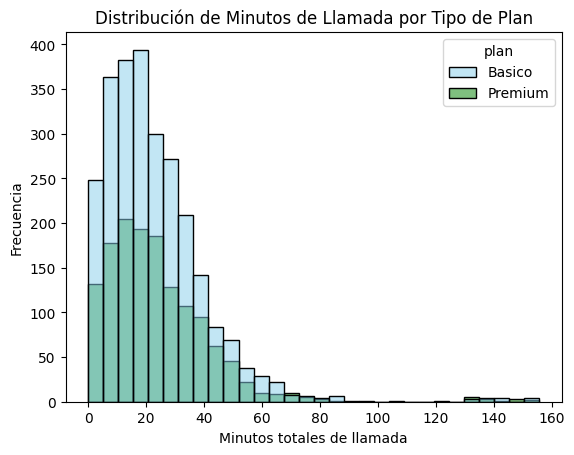

In [34]:
sns.histplot(
    data=user_profile,
    x="cant_minutos_llamada",
    hue="plan",
    palette=["skyblue", "green"],
    kde=False,
    bins=30
)
plt.title("Distribución de Minutos de Llamada por Tipo de Plan")
plt.xlabel("Minutos totales de llamada")
plt.ylabel("Frecuencia")
plt.show()

💡**Insight — Distribución de Minutos Totales de Llamada por Tipo de Plan**

La distribución está fuertemente sesgada a la derecha: la mayoría de los usuarios acumulan pocos minutos de llamada, y solo unos pocos concentran valores altos.

El plan Básico domina claramente los rangos bajos (0 a 40 minutos), con mayor frecuencia en todos los tramos iniciales.

El plan Premium aparece con más fuerza en los rangos medios y altos, lo que sugiere un comportamiento de uso más intensivo.

Esto indica que los usuarios Premium tienden a realizar llamadas más largas o más frecuentes que los del plan Básico.

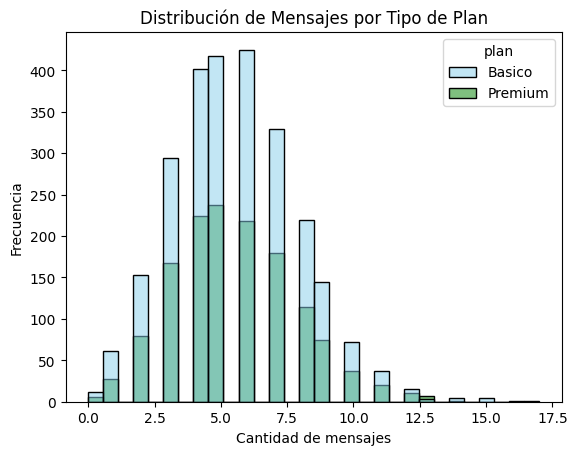

In [35]:
sns.histplot(
    data=user_profile,
    x="cant_mensajes",
    hue="plan",
    palette=["skyblue", "green"],
    kde=False,
    bins=30
)
plt.title("Distribución de Mensajes por Tipo de Plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Frecuencia")
plt.show()

💡**Insight — Distribución de Mensajes por Tipo de Plan**
La distribución es ligeramente sesgada a la derecha: la mayoría de los usuarios envían pocos mensajes, y hay una caída progresiva hacia los valores más altos.

El plan Básico domina claramente en todos los rangos de mensajes, especialmente entre 3 y 7 mensajes, donde se concentra la mayor frecuencia.

Los usuarios del plan Premium aparecen en menor proporción, pero tienden a estar más presentes en los niveles medios y altos de mensajes.

Esto sugiere que, aunque hay menos usuarios Premium, su comportamiento de mensajería podría ser más activo en promedio.

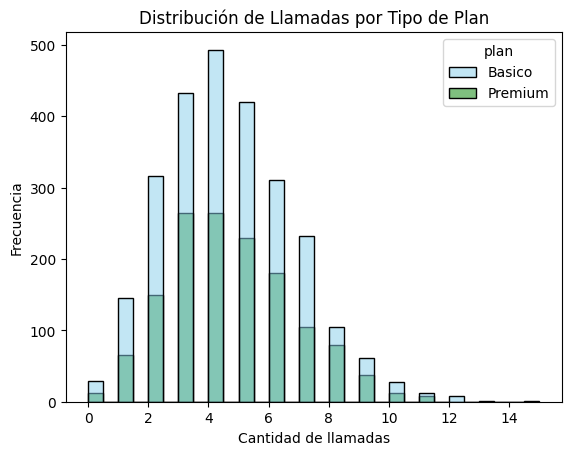

In [36]:
sns.histplot(
    data=user_profile,
    x="cant_llamadas",
    hue="plan",
    palette=["skyblue", "green"],
    kde=False,
    bins=30
)
plt.title("Distribución de Llamadas por Tipo de Plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Frecuencia")
plt.show()

💡**Insight — Distribución de Llamadas por Tipo de Plan**

La distribución es ligeramente sesgada a la derecha: la mayoría de los usuarios realizan entre 3 y 6 llamadas, con un pico claro en las 4 llamadas.

El plan Básico tiene mayor frecuencia en todos los rangos bajos, especialmente entre 3 y 5 llamadas.

El plan Premium aparece con menor frecuencia, pero muestra una presencia más estable en los rangos medios.

No se observa una diferencia drástica entre planes, aunque los usuarios Básico tienden a realizar menos llamadas en promedio.

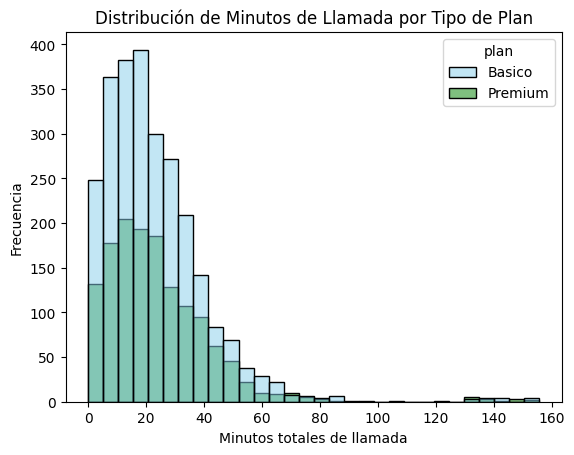

In [37]:
sns.histplot(
    data=user_profile,
    x="cant_minutos_llamada",
    hue="plan",
    palette=["skyblue", "green"],
    kde=False,
    bins=30
)
plt.title("Distribución de Minutos de Llamada por Tipo de Plan")
plt.xlabel("Minutos totales de llamada")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- ...

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

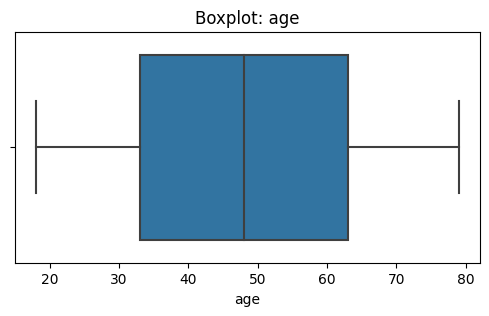

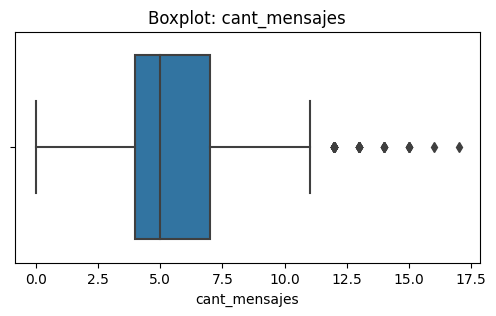

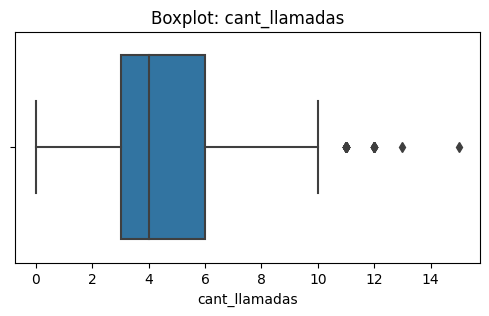

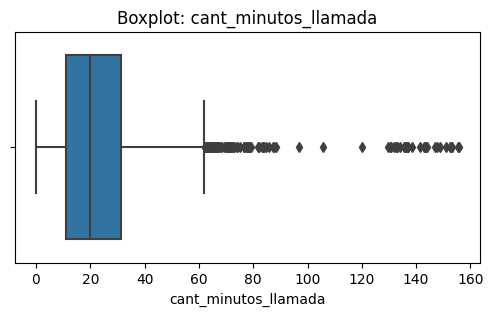

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡**Insights — Identificación de Outliers**

    Age
No presenta outliers significativos.

La distribución está concentrada entre 30 y 65 años, con whiskers que se extienden hasta aproximadamente 20 y 80.

No hay puntos individuales fuera del rango, lo que indica que los valores extremos están dentro de lo esperado.

    cant_mensajes
Sí presenta outliers.

La mayoría de los usuarios envían entre 4 y 8 mensajes, pero hay varios puntos por encima de 12, llegando hasta 17.5.

Estos valores representan usuarios con actividad de mensajería más intensa.

    cant_llamadas
Sí presenta outliers.

El rango típico está entre 3 y 7 llamadas, pero hay usuarios que superan las 10 llamadas, con puntos visibles hasta 15.

Son pocos, pero claramente fuera del patrón general.

    cant_minutos_llamada
Sí presenta outliers marcados.

La mayoría de los usuarios acumulan menos de 40 minutos, pero hay muchos puntos dispersos que superan ampliamente ese valor.

Es la variable con mayor dispersión y concentración de outliers.

In [39]:
import numpy as np

columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 - 1.5 * IQR

    print(f"\nColumna: {col}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")
    print(f"Máximo real: {user_profile[col].max()}")


Columna: cant_mensajes
Límite inferior: -0.5
Límite superior: 2.5
Máximo real: 17.0

Columna: cant_llamadas
Límite inferior: -1.5
Límite superior: 1.5
Máximo real: 15.0

Columna: cant_minutos_llamada
Límite inferior: -19.322500000000005
Límite superior: 0.9724999999999966
Máximo real: 155.69


In [40]:
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡**Insights: 
Mantener o no outliers, porqué?**

    cant_mensajes
Mantener los outliers.
Representan usuarios con mayor actividad real.
No son errores y no distorsionan la media de forma significativa.

    cant_llamadas
Mantener los outliers.
Los valores altos corresponden a heavy users legítimos.
Son pocos y no afectan de manera crítica la distribución general.

    cant_minutos_llamada
Mantener los outliers (con precaución).
Los valores altos reflejan uso intensivo real.
La variable es naturalmente dispersa; eliminar outliers ocultaría comportamientos importantes.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [41]:
# Crear columna grupo_uso
user_profile["grupo_uso"] = np.where(
    (user_profile["cant_llamadas"] < 5) & (user_profile["cant_mensajes"] < 5),
    "Bajo uso",
    np.where(
        (user_profile["cant_llamadas"] < 10) & (user_profile["cant_mensajes"] < 10),
        "Uso medio",
        "Alto uso"
    )
)


In [43]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [44]:
# Crear columna grupo_edad
user_profile["grupo_edad"] = np.where(
    user_profile["age"] < 30,
    "Joven",
    np.where(
        user_profile["age"] < 60,
        "Adulto",
        "Adulto Mayor"
    )
)

In [45]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

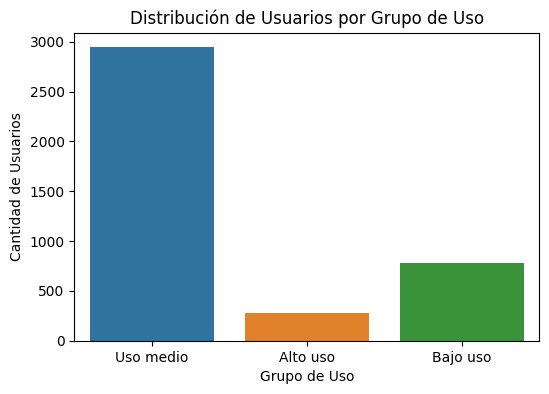

In [46]:
# Visualización de los segmentos por uso
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x="grupo_uso")
plt.title("Distribución de Usuarios por Grupo de Uso")
plt.xlabel("Grupo de Uso")
plt.ylabel("Cantidad de Usuarios")
plt.show()

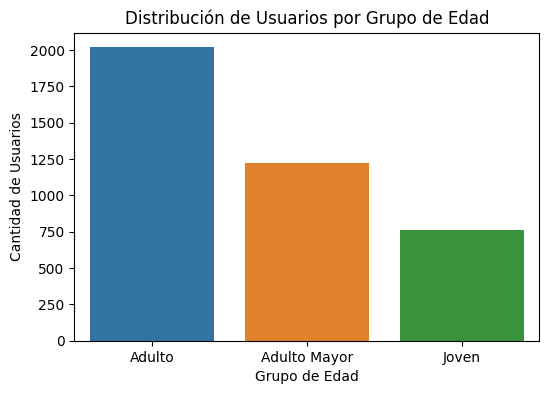

In [47]:
# Visualización de los segmentos por edad
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x="grupo_edad")
plt.title("Distribución de Usuarios por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmente los datos y qué porcentaje/cantidad representaban?

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?

- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Problemas originales en los datos**
city (users): 469 nulos → 11.7%
churn_date (users): 3534 nulos → 88.3% (usuarios activos)
date (usage): 50 nulos → 0.12%
duration (usage): 22076 nulos → 55.19% (solo aplica a llamadas)
length (usage): 17896 nulos → 44.74% (solo aplica a mensajes)
age: valor inválido –999, corregido con la mediana
reg_date: 40 fechas en 2026 → fuera de rango, corregidas a NaT

🔍 Segmentos de clientes identificados
Por edad
Jóvenes (<30): grupo pequeño
Adultos (30–59): grupo dominante
Adulto Mayor (60+): grupo relevante y numeroso

➡️ La base de clientes es mayoritariamente adulta, con fuerte presencia de adultos mayores.

Por nivel de uso
Bajo uso: actividad mínima
Uso medio: grupo más grande (3–7 llamadas, 4–8 mensajes)
Alto uso: heavy users con llamadas, mensajes y minutos muy superiores al promedio

➡️ La mayoría usa el servicio de forma moderada, pero existe un segmento pequeño de alto valor.

⭐ Segmentos más valiosos para ConnectaTel
El cruce de patrones muestra que los clientes más valiosos son:

Adultos y Adultos Mayores + Alto uso + Plan Premium
Porque:

consumen más minutos y mensajes,
pagan un plan más caro,
muestran uso intensivo real,
tienen mayor potencial de retención y upselling.

🚨 Patrones de uso extremo (outliers)
Mensajes: hasta 17 → heavy texters reales
Llamadas: hasta 15 → usuarios con alta frecuencia
Minutos: hasta 155.69 → uso intensivo muy por encima del promedio

➡️ Estos outliers no son errores, representan clientes de alto valor que requieren atención diferenciada.

💡 Recomendaciones basadas en los datos
1. Crear un plan “Premium Plus”
Dirigido a heavy users con:
más minutos,
más mensajes,
beneficios exclusivos.

2. Retención proactiva para usuarios de alto uso
descuentos por lealtad,
paquetes adicionales,
beneficios por antigüedad.

3. Ajustar el plan Básico
Muchos usuarios de uso medio están en Básico.
Se recomienda:
aumentar ligeramente los límites,
ofrecer un “Básico Plus” para evitar migración a la competencia.

4. Campañas segmentadas por edad
Adultos y Adultos Mayores → priorizar minutos y estabilidad
Jóvenes → enfocarse en datos y mensajes**


### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
city con 11.7% de nulos y churn_date con 88.3% (usuarios activos).

En usage, duration y length con nulos estructurales según el tipo de evento.

Edad con sentinel –999 y 40 fechas fuera de rango (año 2026).

🔍 **Segmentos por Edad**
Predominan los Adultos (30–59).

Los Adultos Mayores (60+) también representan un grupo importante.

📊 **Segmentos por Nivel de Uso**
La mayoría pertenece a Uso medio.

El grupo Alto uso es pequeño pero con consumo muy superior al promedio.

➡️ **Esto sugiere que ...**
ConnectaTel tiene una base madura con uso moderado, pero un segmento reducido de heavy users que concentra gran parte del consumo y del valor potencial.

💡 **Recomendaciones**
Crear un plan Premium Plus para usuarios de alto uso.

Ajustar el plan Básico para retener a usuarios de uso medio y evitar fuga

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`